In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime

In [2]:
# Read the dataset
market = pd.read_csv('dataset_group.csv')

In [3]:
# Checking first 5 rows in the data
market.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
# Checking last 5 rows in the data
market.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [5]:
# To check datatype of each column
market.dtypes

Date        object
Order_id     int64
Product     object
dtype: object

In [6]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [7]:
# To check summary of data
market.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [8]:
# To check duplicates in the data
dups = market.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 4730


In [9]:
# Before removing duplicates
market.shape

(20641, 3)

In [10]:
market.duplicated().sum()

4730

In [11]:
market.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

## Exploratory Analysis and Inferences

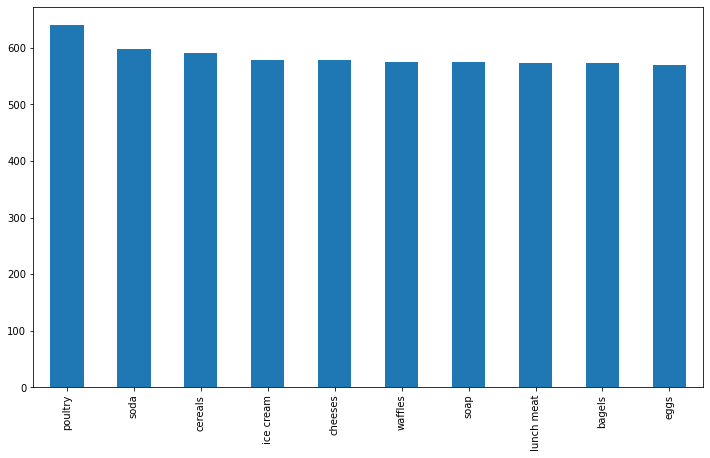

In [12]:
market['Product'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12,7));

In [13]:
from wordcloud import WordCloud

(-0.5, 511.5, 383.5, -0.5)

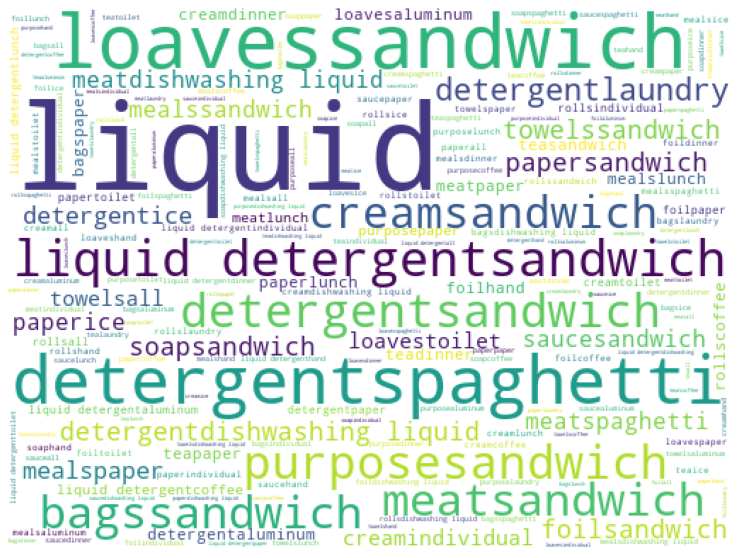

In [14]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(market['Product']))

plt.imshow(wordcloud)
plt.axis('off')

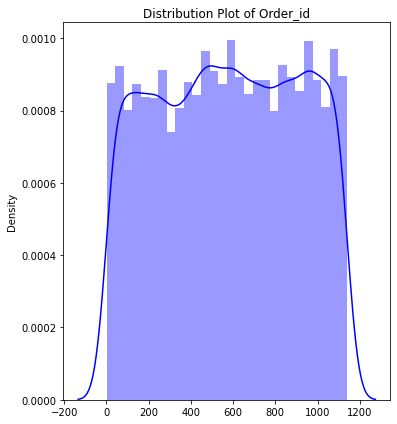

In [15]:
plt.figure(figsize = (15,6))
feature_list = market.describe().columns
for i in range(len(feature_list)):
    plt.subplot(1,3,i+1)
    sns.distplot(x=market[feature_list[i]], color='b',fit = None)
    plt.title('Distribution Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

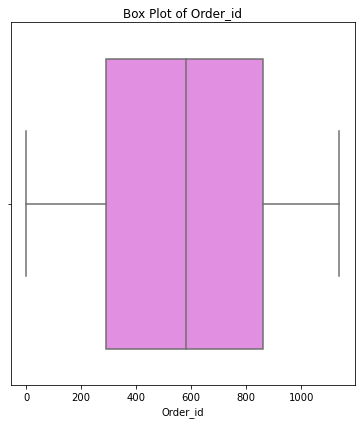

In [16]:
plt.figure(figsize = (15,6))
feature_list = market.describe().columns
for i in range(len(feature_list)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=market[feature_list[i]], color='violet')
    plt.title('Box Plot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [17]:
market_milestone = pd.read_csv('milestone_2.csv')

In [18]:
market_milestone.head()

,Support,Confidence,Lift,Recommended_item,Recommended_with,Items_list
0,0.050044,0.640449,1.700401,juice,<---,"[yogurt, toilet paper, aluminum foil]"
1,0.050044,0.619565,1.644953,juice,<---,"[yogurt, poultry, aluminum foil]"
2,0.050044,0.612903,1.615965,coffee/tea,<---,"[yogurt, cheeses, cereals]"
3,0.050044,0.600000,1.423750,poultry,<---,"[dishwashing liquid/detergent, laundry deterge..."
4,0.050922,0.630435,1.677722,mixes,<---,"[yogurt, poultry, aluminum foil]"


In [19]:
market_milestone.describe().T

,count,mean,std,min,25%,50%,75%,max
Support,24.0,0.051983,0.001775,0.050044,0.050922,0.051800,0.052239,0.055312
Confidence,24.0,0.630940,0.021766,0.600000,0.615992,0.630217,0.641505,0.686047
Lift,24.0,1.617415,0.084795,1.423750,1.583164,1.621006,1.653101,1.791193


In [20]:
market_milestone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Support           24 non-null     float64
 1   Confidence        24 non-null     float64
 2   Lift              24 non-null     float64
 3   Recommended_item  24 non-null     object 
 4   Recommended_with  24 non-null     object 
 5   Items_list        24 non-null     object 
dtypes: float64(3), object(3)
memory usage: 1.2+ KB


In [21]:
market_milestone.describe(include='object').T

,count,unique,top,freq
Recommended_item,24,13,poultry,5
Recommended_with,24,1,<---,24
Items_list,24,23,"[yogurt, poultry, aluminum foil]",2


In [22]:
market_milestone.sort_values('Lift')

,Support,Confidence,Lift,Recommended_item,Recommended_with,Items_list
3,0.050044,0.600000,1.423750,poultry,<---,"[dishwashing liquid/detergent, laundry deterge..."
15,0.051800,0.602041,1.428593,poultry,<---,"[dinner rolls, spaghetti sauce, juice]"
9,0.050922,0.637363,1.512408,poultry,<---,"[dinner rolls, spaghetti sauce, cereals]"
19,0.053556,0.655914,1.556429,poultry,<---,"[dinner rolls, spaghetti sauce, laundry deterg..."
7,0.050922,0.617021,1.558287,cereals,<---,"[cheeses, bagels, sandwich bags]"
20,0.055312,0.623762,1.564902,ice cream,<---,"[paper towels, eggs, pasta]"
10,0.050922,0.604167,1.589251,milk,<---,"[poultry, laundry detergent, cereals]"
11,0.051800,0.627660,1.610145,eggs,<---,"[dinner rolls, poultry, soda]"
14,0.051800,0.627660,1.613779,dinner rolls,<---,"[spaghetti sauce, poultry, juice]"
2,0.050044,0.612903,1.615965,coffee/tea,<---,"[yogurt, cheeses, cereals]"
